# Raport z zadania uczenie (się) ze wzmocnieniem
### Aleksander Szymczyk (aleksander.szymczyk.stud@pw.edu.pl)

In [1]:
import gymnasium as gym
import pandas as pd
from experiment import experiment, visualize

In [2]:
env = gym.make("Taxi-v3", render_mode='rgb_array').env
LEARNING_RATES = [0.7, 0.8, 0.9, 0.95, 0.8, 0.7]
DISCOUNT_FACTORS = [0.6, 0.7, 0.8, 0.5, 0.6, 0.7]
EXPLORATION_PROBABILITY = [0.2, 0.3, 0.4, 0.1, 0.2, 0.3]
MAX_EPISODE_STEPS = [100, 100, 100, 200, 200, 200]
NUMBER_EPISODES = [30001 for _ in range(6)]
results, best_model_training, best_q_table = experiment(env, LEARNING_RATES, DISCOUNT_FACTORS, EXPLORATION_PROBABILITY, MAX_EPISODE_STEPS, NUMBER_EPISODES)
df = pd.DataFrame(results)
df

,Number of episodes,Learning rate,Discount factor,Exploration probability,Max episode steps,Final reward,Final steps number
0,30001,0.70,0.6,0.2,100,0.116491,13.1
1,30001,0.80,0.7,0.3,100,0.056214,13.7
2,30001,0.90,0.8,0.4,100,0.078708,13.7
3,30001,0.95,0.5,0.1,200,0.042486,13.3
4,30001,0.80,0.6,0.2,200,0.077288,12.3
5,30001,0.70,0.7,0.3,200,0.034673,13.1


In [3]:
df2 = pd.DataFrame(best_model_training)
df2

,Episode_number,Average_reward,Average_steps_per_episode,Penalties
0,0,-0.101010,100.0,0.0
1,1000,0.077668,29.4,0.0
2,2000,0.098248,12.8,0.0
3,3000,0.070439,12.6,0.0
4,4000,0.229777,10.9,0.0
5,5000,0.043728,13.1,0.0
6,6000,0.139565,13.2,0.0
7,7000,0.079492,13.2,0.0
8,8000,0.092826,13.6,0.0
9,9000,0.206307,11.3,0.0


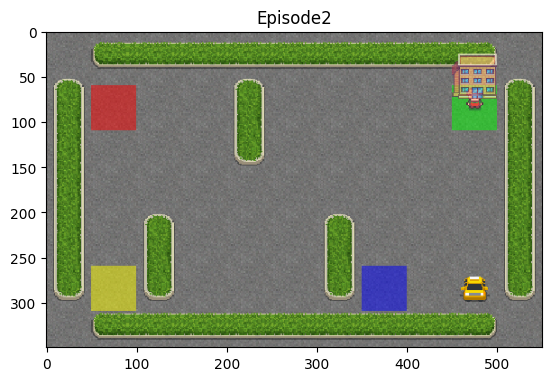

In [4]:
visualize(env, best_q_table, 10)

# Trenowanie

# Wyniki
# Wnioski